<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Assignment 12: Rút Trích Đặc Trưng</b></h1>


**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

# Import Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms as transforms
import cv2
from matplotlib import pyplot as plt

import os

from sklearn import neighbors, datasets

# Download Dataset tự chuẩn bị

In [2]:
!!gdown --id 15a1NXDN6pmVe476lf850svvycdnjQ-xJ
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
  inflating: dataset/car1.jpg        
  inflating: dataset/car2.jpg        
  inflating: dataset/car3.jpg        
  inflating: dataset/car4.jpg        
  inflating: dataset/car5.jpg        
  inflating: dataset/cat.jpg         
  inflating: dataset/cat1.jpg        
  inflating: dataset/cat2.jpg        
  inflating: dataset/cat3.jpg        
  inflating: dataset/cat4.jpg        
  inflating: dataset/dog1.jpg        
  inflating: dataset/dog2.jpg        
  inflating: dataset/dog3.jpg        
  inflating: dataset/dog4.jpg        
  inflating: dataset/dog5.jpg        
  inflating: dataset/person1.jpg     
  inflating: dataset/person2.jpg     
  inflating: dataset/person3.jpg     
  inflating: dataset/person4.jpg     
  inflating: dataset/tree1.jpg       
  inflating: dataset/tree2,jpg.jpg   
  inflating: dataset/tree3.jpg       
  inflating: dataset/tree4.jpg       
  inflating: dataset/tree5.jpg       


In [3]:
data_path="/content/dataset"

# Visualize Dataset

In [8]:
# Load hình 
image_dir = sorted(os.listdir(data_path))
len(image_dir)

24

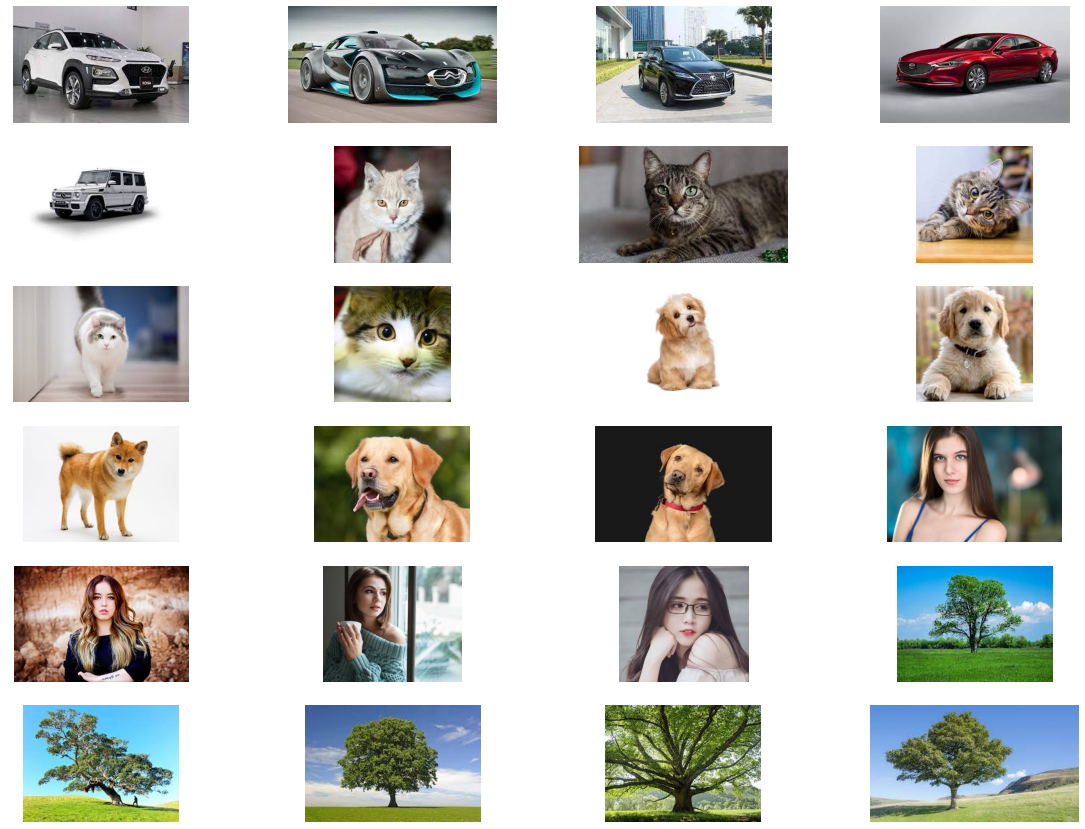

In [23]:
fig = plt.figure(figsize=(20, 15))
for idx, filename in enumerate(image_dir):
    img = cv2.imread(os.path.join(data_path,filename))

    fig.add_subplot(6, 4, idx+1)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

# Rút trích đặc trưng sử dụng VGG

In [10]:
# Download model
model_vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [25]:
model_vgg16.classifier = model_vgg16.classifier[0:len(model_vgg16.classifier)-1]
model_vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
preprocess_vgg = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [27]:
data=[]
labels=[]
for file in os.listdir(data_path):
  label=file.split(".")[0][0:-1]
  data.append(os.path.join(data_path,file))
  labels.append(label)
print(len(labels),len(data))
  

24 24


In [29]:
features_vgg=[]

for i, img in enumerate(data):
    img_pil = Image.open(img)
    img_tensor_vgg = preprocess_vgg(img_pil)
    img_tensor_vgg.unsqueeze_(0)
    img_var_vgg = Variable(img_tensor_vgg)
    ## Trich Xuat Dat Trung ##
    out_vgg = model_vgg16(img_var_vgg)
    newOut_vgg =np.squeeze(out_vgg.data.numpy())
    features_vgg.append(newOut_vgg)
    i+=1
print(len(features_vgg))

24


In [31]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=3)
knn.fit(features_vgg)

NearestNeighbors(n_neighbors=3)

# Bước 4+5 Đọc ảnh truy vấn và rút trích đặc trưng ảnh


In [30]:
img_path = '/content/dataset/person1.jpg'
img_pil = Image.open(img_path)
img_tensor_vgg = preprocess_vgg(img_pil)
img_tensor_vgg.unsqueeze_(0)
img_var_vgg = Variable(img_tensor_vgg)
## Trich Xuat Dat Trung ##
out_vgg = model_vgg16(img_var_vgg)
newOut_vgg =np.squeeze(out_vgg.data.numpy())

# Bướcc 6 Lấy đặc trưng và tìm top 3 k gần nhất

In [32]:
knn.kneighbors([newOut_vgg], return_distance=False)

array([[1, 3, 5]])

In [33]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

# Bước 7: show các ảnh tương ứng với các k gần nhất

Test Image


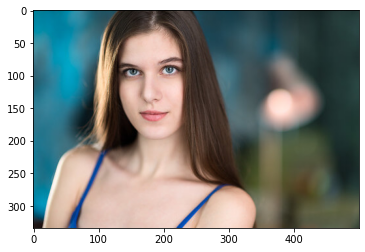

Top 3 Pics


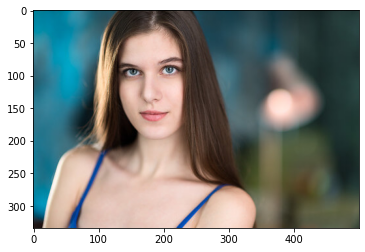

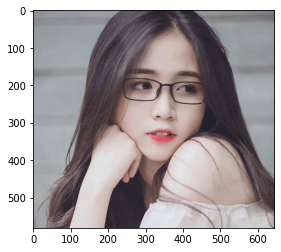

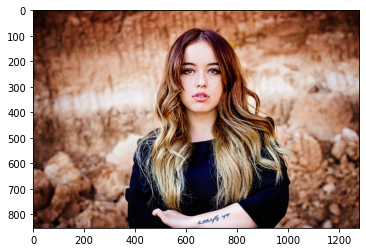

In [34]:
list_knn=knn.kneighbors([newOut_vgg], return_distance=False)
print("Test Image")
showImage(cv2.imread(img_path))
print("Top 3 Pics")
for i in list_knn[0]:
    showImage(cv2.imread(data[i]))